> **Jupyter slideshow:** This notebook can be displayed as slides. To view it as a slideshow in your browser, run the following cell:

> `> jupyter nbconvert [this_notebook.ipynb] --to slides --post serve`
 
> To toggle off the slideshow cell formatting, click the `CellToolbar` button, then `View > Cell Toolbar > None`.

<img src="./images/di.png" width="50" height="50" align="right"/>

# Data Manipulation with Python

In [ ]:
# ! jupyter nbconvert Python_intro.ipynb --to slides --post serve

## Learning Objectives
*In this lesson, we will go over the following:*

- Define what Pandas is and how it relates to data science.
- Manipulate Pandas `DataFrames` and `Series`.
- Filter and sort data using Pandas.
- Manipulate `DataFrame` columns.
- Know how to handle null and missing values.

## Lesson Guide

- [What Is Pandas?](#pandas)
- [Reading Files, Selecting Columns, and Summarizing](#reading-files)
    - [Exercise 1](#exercise-one)
    
    
- [Filtering and Sorting](#filtering-and-sorting)
    - [Exercise 2](#exercise-two)
    
    
- [Renaming, Adding, and Removing Columns](#columns)
- [Handling Missing Values](#missing-values)
    - [Exercise 3](#exercise-three)
    
    
- [Split-Apply-Combine](#split-apply-combine)
    - [Exercise 4](#exercise-four)
    
    
- [Selecting Multiple Columns and Filtering Rows](#multiple-columns)
- [Joining (Merging) DataFrames](#joining-dataframes)
- [OPTIONAL: Other Commonly Used Features](#other-features)
- [OPTIONAL: Other Less Used Features of Pandas](#uncommon-features)
- [Summary](#summary)

<img src="./images/pandas.jpeg" width="300" height="300" align="center"/>

<a id="pandas"></a>

## What Is Pandas?

- **Objective:** Define what Pandas is and how it relates to data science.

Pandas is a Python library that primarily adds two new datatypes to Python: `DataFrame` and `Series`.

- A `Series` is a sequence of items, where each item has a unique label (called an `index`).
- A `DataFrame` is a table of data. Each row has a unique label (the `row index`), and each column has a unique label (the `column index`).
- Note that each column in a `DataFrame` can be considered a `Series` (`Series` index).

> Behind the scenes, these datatypes use the NumPy ("Numerical Python") library. NumPy primarily adds the `ndarray` (n-dimensional array) datatype to Pandas. An `ndarray` is similar to a Python list — it stores ordered data. However, it differs in three respects:
> - Each element has the same datatype (typically fixed-size, e.g., a 32-bit integer).
> - Elements are stored contiguously (immediately after each other) in memory for fast retrieval.
> - The total size of an `ndarray` is fixed.

> Storing `Series` and `DataFrame` data in `ndarray`s makes Pandas faster and uses less memory than standard Python datatypes. Many libraries (such as scikit-learn) accept `ndarray`s as input rather than Pandas datatypes, so we will frequently convert between them.


## Why Pandas is so popular ?
<img src="./images/pandas_stack.png" width="500" height="400" align="center"/>


## Using Pandas

Pandas is frequently used in data science because it offers a large set of commonly used functions, is relatively fast, and has a large community. Because many data science libraries also use NumPy to manipulate data, you can easily transfer data between libraries (as we will often do in this class!).

Pandas is a large library that typically takes a lot of practice to learn. It heavily overrides Python operators, resulting in odd-looking syntax. For example, given a `DataFrame` called `cars` which contains a column `mpg`, we might want to view all cars with mpg over 35. To do this, we might write: `cars[cars['mpg'] > 35]`. In standard Python, this would most likely give a syntax error. (**Challenge:** Using only built-in datatypes, can you define `cars` and `mpg` to make this expression valid?)

Pandas also highly favors certain patterns of use. For example, looping through a `DataFrame` row by row is highly discouraged. Instead, Pandas favors using **vectorized functions** that operate column by column. (This is because each column is stored separately as an `ndarray`, and NumPy is optimized for operating on `ndarray`s.)

Do not be discouraged if Pandas feels overwhelming. Gradually, as you use it, you will become familiar with which methods to use and the "Pandas way" of thinking about and manipulating data.

### Class Methods and Attributes

Pandas `DataFrame`s are Pandas class objects and therefore come with attributes and methods. To access these, follow the variable name with a dot. For example, given a `DataFrame` called `users`:

```
- users.index       # accesses the `index` attribute -- note there are no parentheses. attributes are not callable
- users.head()      # calls the `head` method (since there are open/closed parentheses)
- users.head(10)    # calls the `head` method with parameter `10`, indicating the first 10 rows. this is the same as:
- users.head(n=10)  # calls the `head` method, setting the named parameter `n` to have a value of `10`.
```

We know that the `head` method accepts one parameter with an optional name of `n` because it is in the documentation for that method. Let's see how to view the documentation next.

## First lets import Pandas

In [1]:
# Load Pandas into Python
import pandas as pd
from matplotlib import pyplot as plt


<a id="reading-files"></a>
### Reading Files, Selecting Columns, and Summarizing

In [2]:
# using the read_csv method of pandas we read file 
users = pd.read_csv('./data/user.tbl', sep='|')

**Examine the users data.**

In [3]:
users                   # Print the first 30 and last 30 rows.

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [4]:
type(users)             # DataFrame

pandas.core.frame.DataFrame

In [5]:
# how to get the size of the dtaframe?
users.shape

(943, 5)

In [10]:
users.head()          # Print the first five rows.

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [7]:
users.head(10)          # Print the first 10 rows.

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [8]:
users.tail()            # Print the last five rows.

,user_id,age,gender,occupation,zip_code
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


In [11]:
users.tail(1)

,user_id,age,gender,occupation,zip_code
942,943,22,M,student,77841


In [12]:
 # The row index (aka "the row labels" — in this case integers)
users.index            

RangeIndex(start=0, stop=943, step=1)

In [13]:
# Column names (which is "an index")
users.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [14]:
# Datatypes of each column — each column is stored as an ndarray, which has a datatype
users.dtypes

user_id        int64
age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [15]:
# Number of rows and columns
users.shape

(943, 5)

In [17]:
users.shape[1]

5

In [18]:
# All values as a NumPy array
users.values

array([[1, 24, 'M', 'technician', '85711'],
       [2, 53, 'F', 'other', '94043'],
       [3, 23, 'M', 'writer', '32067'],
       ...,
       [941, 20, 'M', 'student', '97229'],
       [942, 48, 'F', 'librarian', '78209'],
       [943, 22, 'M', 'student', '77841']], dtype=object)

In [19]:
# Concise summary (including memory usage) — useful to quickly see if nulls exist
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


** Select or index data.**<br>
Pandas `DataFrame`s have structural similarities with Python-style lists and dictionaries.  
In the example below, we select a column of data using the name of the column in a similar manner to how we select a dictionary value with the dictionary key.

In [23]:
users['gender']

0      M
1      F
2      M
3      M
4      F
      ..
938    F
939    M
940    M
941    F
942    M
Name: gender, Length: 943, dtype: object

In [21]:
# DataFrame columns are Pandas Series.
type(users['age'])

pandas.core.series.Series

In [24]:
# Select one column using the DataFrame attribute.
users.gender
# While a useful shorthand, these attributes only exist
# if the column name has no punctuations or spaces.

0      M
1      F
2      M
3      M
4      F
      ..
938    F
939    M
940    M
941    F
942    M
Name: gender, Length: 943, dtype: object

**Summarize (describe) the data.**<br>
Pandas has a bunch of built-in methods to quickly summarize your data and provide you with a quick general understanding.

In [25]:
# Describe all numeric columns.
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [26]:
# Describe all columns, including non-numeric.
users.describe(include='all')

,user_id,age,gender,occupation,zip_code
count,943.000000,943.000000,943,943,943
unique,NaN,NaN,2,21,795
top,NaN,NaN,M,student,55414
freq,NaN,NaN,670,196,9
mean,472.000000,34.051962,NaN,NaN,NaN
std,272.364951,12.192740,NaN,NaN,NaN
min,1.000000,7.000000,NaN,NaN,NaN
25%,236.500000,25.000000,NaN,NaN,NaN
50%,472.000000,31.000000,NaN,NaN,NaN
75%,707.500000,43.000000,NaN,NaN,NaN


In [27]:
# Describe a single column — recall that "users.gender" refers to a Series.
users.gender.describe()

count     943
unique      2
top         M
freq      670
Name: gender, dtype: object

In [28]:
# Calculate the mean of the ages.
users.age.mean()

34.05196182396607

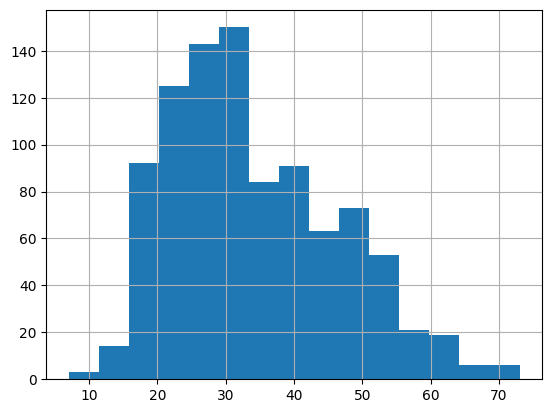

In [33]:
# Draw a histogram of a column (the distribution of ages).
users.age.hist(bins=15);

**Count the number of occurrences of each value.**

In [34]:
users.gender.value_counts()  

# Most useful for categorical variables

gender
M    670
F    273
Name: count, dtype: int64

In [35]:
# How many of each zip codes do we have? 
users.zip_code.value_counts()

zip_code
55414    9
55105    6
55337    5
10003    5
20009    5
        ..
24060    1
55413    1
19149    1
02176    1
77841    1
Name: count, Length: 795, dtype: int64

In [36]:
users.gender.value_counts()

gender
M    670
F    273
Name: count, dtype: int64

<Axes: ylabel='count'>

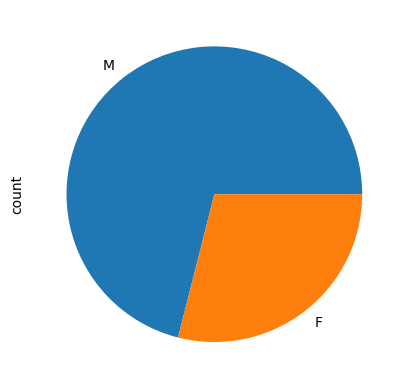

In [38]:
users.gender.value_counts().plot(kind='pie')     # Quick plot by category

In [39]:
# Can also be used with numeric variables
#   Try .sort_index() to sort by indices or .sort_values() to sort by counts.
users.age.value_counts()

age
30    39
25    38
22    37
28    36
27    35
      ..
7      1
66     1
11     1
10     1
73     1
Name: count, Length: 61, dtype: int64

In [40]:
users.age.value_counts().sort_index()

age
7     1
10    1
11    1
13    5
14    3
     ..
66    1
68    2
69    2
70    3
73    1
Name: count, Length: 61, dtype: int64

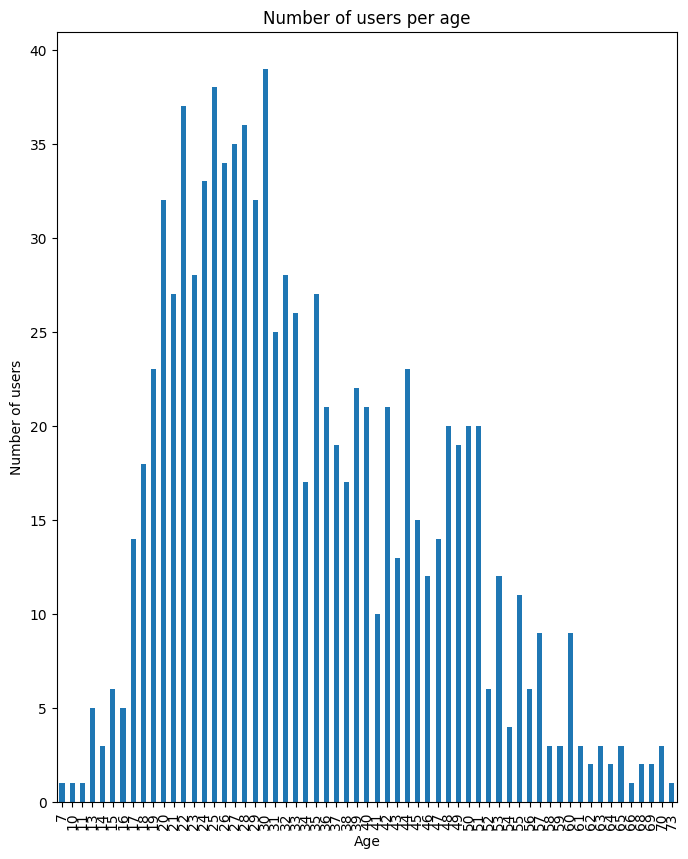

In [41]:
users.age.value_counts().sort_index().plot(kind='bar', figsize=(8,10),);     # Bigger plot by increasing age
plt.xlabel('Age');
plt.ylabel('Number of users');
plt.title('Number of users per age');

<a id="exercise-one"></a>
# Excercise 1 
<img src="./images/hands_on.jpg" width="100" height="100" align="right"/>



In [42]:
# Read drinks.csv into a DataFrame called "drinks".
import pandas as pd
drinks = pd.read_csv('./data/drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [43]:
drinks.shape

(193, 6)

In [ ]:
# Print the head and the tail.
drinks.head()

In [44]:
drinks.tail()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF
192,Zimbabwe,64,18,4,4.7,AF


In [45]:
# Examine the default index, datatypes, and shape.
drinks.index, drinks.dtypes, drinks.shape

(RangeIndex(start=0, stop=193, step=1),
 country                          object
 beer_servings                     int64
 spirit_servings                   int64
 wine_servings                     int64
 total_litres_of_pure_alcohol    float64
 continent                        object
 dtype: object,
 (193, 6))

In [46]:
# Print the beer_servings Series.
print(drinks['beer_servings'])

0        0
1       89
2       25
3      245
4      217
      ... 
188    333
189    111
190      6
191     32
192     64
Name: beer_servings, Length: 193, dtype: int64


In [47]:
# Calculate the average beer_servings for the entire data set.
drinks['beer_servings'].mean()

106.16062176165804

In [48]:
# Count the number of occurrences of each "continent" value and see if it looks correct.
drinks.continent.value_counts()

continent
AF    53
EU    45
AS    44
OC    16
SA    12
Name: count, dtype: int64

In [49]:
drinks.describe(include='all')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
count,193,193.000000,193.000000,193.000000,193.000000,170
unique,193,NaN,NaN,NaN,NaN,5
top,Afghanistan,NaN,NaN,NaN,NaN,AF
freq,1,NaN,NaN,NaN,NaN,53
mean,NaN,106.160622,80.994819,49.450777,4.717098,NaN
std,NaN,101.143103,88.284312,79.697598,3.773298,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,20.000000,4.000000,1.000000,1.300000,NaN
50%,NaN,76.000000,56.000000,8.000000,4.200000,NaN
75%,NaN,188.000000,128.000000,59.000000,7.200000,NaN


<a id="filtering-and-sorting"></a>
### Filtering and Sorting

<img src="./images/panda_sort.jpg" width="300" height="300" align="right"/>



- **Objective:** Filter and sort data using Pandas.

We can use simple operator comparisons on columns to extract relevant or drop irrelevant information.

**Logical filtering: Only show users with age < 20.**

In [52]:
# Create a Series of Booleans…
# In Pandas, this comparison is performed element-wise on each row of data.
young_bool = users.age < 20
young_bool

0      False
1      False
2      False
3      False
4      False
       ...  
938    False
939    False
940    False
941    False
942    False
Name: age, Length: 943, dtype: bool

In [53]:
# …and use that Series to filter rows.
# In Pandas, indexing a DataFrame by a Series of Booleans only selects rows that are True in the Boolean.
users[users.age==14]
#users[young_bool]

,user_id,age,gender,occupation,zip_code
205,206,14,F,student,53115
812,813,14,F,student,02136
886,887,14,F,student,27249


In [54]:
users['boolage'] = users.age < 30
users.head(5)

,user_id,age,gender,occupation,zip_code,boolage
0,1,24,M,technician,85711,True
1,2,53,F,other,94043,False
2,3,23,M,writer,32067,True
3,4,24,M,technician,43537,True
4,5,33,F,other,15213,False


In [55]:
# Or, combine into a single step.
users[users.age < 20]

,user_id,age,gender,occupation,zip_code,boolage
29,30,7,M,student,55436,True
35,36,19,F,student,93117,True
51,52,18,F,student,55105,True
56,57,16,M,none,84010,True
66,67,17,M,student,60402,True
...,...,...,...,...,...,...
871,872,19,F,student,74078,True
879,880,13,M,student,83702,True
886,887,14,F,student,27249,True
903,904,17,F,student,61073,True


In [56]:
users.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code', 'boolage'], dtype='object')

In [57]:
users['is_young']=0

In [58]:
users.head()

,user_id,age,gender,occupation,zip_code,boolage,is_young
0,1,24,M,technician,85711,True,0
1,2,53,F,other,94043,False,0
2,3,23,M,writer,32067,True,0
3,4,24,M,technician,43537,True,0
4,5,33,F,other,15213,False,0


In [62]:
# Important: This creates a view of the original DataFrame, not a new DataFrame.
# If you alter this view (e.g., by storing it in a variable and altering that)
# You will alter only the slice of the DataFrame and not the actual DataFrame itself
# Here, notice that Pandas gives you a SettingWithCopyWarning to alert you of this.

# It is best practice to use .loc and .iloc instead of the syntax below

users_under20 = users[users.age < 20]   # To resolve this warning, copy the `DataFrame` using `.copy()`.
print(users_under20)

     user_id  age gender occupation zip_code  boolage  is_young
29        30    7      M    student    55436     True         0
35        36   19      F    student    93117     True         0
51        52   18      F    student    55105     True         0
56        57   16      M       none    84010     True         0
66        67   17      M    student    60402     True         0
..       ...  ...    ...        ...      ...      ...       ...
871      872   19      F    student    74078     True         0
879      880   13      M    student    83702     True         0
886      887   14      F    student    27249     True         0
903      904   17      F    student    61073     True         0
924      925   18      F   salesman    49036     True         0

[77 rows x 7 columns]


In [63]:
# Select one column from the filtered results.
users[users.age < 20].occupation

29      student
35      student
51      student
56         none
66      student
         ...   
871     student
879     student
886     student
903     student
924    salesman
Name: occupation, Length: 77, dtype: object

In [64]:
# value_counts of resulting Series
users[users.age < 20].occupation.value_counts()

occupation
student          64
other             4
none              3
entertainment     2
writer            2
artist            1
salesman          1
Name: count, dtype: int64

**Logical filtering with multiple conditions**

In [65]:
# Ampersand for `AND` condition. (This is a "bitwise" `AND`.)
# Important: You MUST put parentheses around each expression because `&` has a higher precedence than `<`.
users[(users.age < 20) & (users.gender=='M')]

,user_id,age,gender,occupation,zip_code,boolage,is_young
29,30,7,M,student,55436,True,0
56,57,16,M,none,84010,True,0
66,67,17,M,student,60402,True,0
67,68,19,M,student,22904,True,0
100,101,15,M,student,05146,True,0
109,110,19,M,student,77840,True,0
141,142,13,M,other,48118,True,0
178,179,15,M,entertainment,20755,True,0
220,221,19,M,student,20685,True,0
245,246,19,M,student,28734,True,0


In [66]:
# Pipe for `OR` condition. (This is a "bitwise" `OR`.)
# Important: You MUST put parentheses around each expression because `|` has a higher precedence than `<`.
users[(users.age < 20) | (users.age > 60)]

,user_id,age,gender,occupation,zip_code,boolage,is_young
29,30,7,M,student,55436,True,0
35,36,19,F,student,93117,True,0
51,52,18,F,student,55105,True,0
56,57,16,M,none,84010,True,0
66,67,17,M,student,60402,True,0
...,...,...,...,...,...,...,...
879,880,13,M,student,83702,True,0
886,887,14,F,student,27249,True,0
903,904,17,F,student,61073,True,0
924,925,18,F,salesman,49036,True,0


In [67]:
# Preferred alternative to multiple `OR` conditions

# users[(users['occupation']=='doctor') | (users['occupation']=='lawyer')]
users[users.occupation.isin(['doctor', 'lawyer'])]

,user_id,age,gender,occupation,zip_code,boolage,is_young
9,10,53,M,lawyer,90703,False,0
124,125,30,M,lawyer,22202,False,0
125,126,28,F,lawyer,20015,True,0
137,138,46,M,doctor,53211,False,0
160,161,50,M,lawyer,55104,False,0
204,205,47,M,lawyer,06371,False,0
250,251,28,M,doctor,85032,True,0
298,299,29,M,doctor,63108,True,0
338,339,35,M,lawyer,37901,False,0
364,365,29,M,lawyer,20009,True,0


**Sorting**

In [68]:
# Sort a Series.
users.age.sort_values()

29      7
470    10
288    11
879    13
608    13
       ..
584    69
766    70
802    70
859    70
480    73
Name: age, Length: 943, dtype: int64

In [69]:
# Sort a DataFrame by a single column.
users.sort_values('age')

,user_id,age,gender,occupation,zip_code,boolage,is_young
29,30,7,M,student,55436,True,0
470,471,10,M,student,77459,True,0
288,289,11,M,none,94619,True,0
879,880,13,M,student,83702,True,0
608,609,13,F,student,55106,True,0
...,...,...,...,...,...,...,...
584,585,69,M,librarian,98501,False,0
766,767,70,M,engineer,00000,False,0
802,803,70,M,administrator,78212,False,0
859,860,70,F,retired,48322,False,0


In [70]:
# Use descending order instead.
users.sort_values('age', ascending=False)

,user_id,age,gender,occupation,zip_code,boolage,is_young
480,481,73,M,retired,37771,False,0
802,803,70,M,administrator,78212,False,0
766,767,70,M,engineer,00000,False,0
859,860,70,F,retired,48322,False,0
584,585,69,M,librarian,98501,False,0
...,...,...,...,...,...,...,...
879,880,13,M,student,83702,True,0
608,609,13,F,student,55106,True,0
288,289,11,M,none,94619,True,0
470,471,10,M,student,77459,True,0


In [71]:
# Sort by multiple columns.
users.sort_values(['occupation', 'age'])

,user_id,age,gender,occupation,zip_code,boolage,is_young
117,118,21,M,administrator,90210,True,0
179,180,22,F,administrator,60202,True,0
281,282,22,M,administrator,20057,True,0
316,317,22,M,administrator,13210,True,0
438,439,23,F,administrator,20817,True,0
...,...,...,...,...,...,...,...
547,548,51,M,writer,95468,False,0
369,370,52,M,writer,08534,False,0
391,392,52,M,writer,59801,False,0
557,558,56,F,writer,63132,False,0


<a id="exercise-two"></a>
### Exercise 2

<img src="./images/hands_on.jpg" width="100" height="100" align="right"/>

Use the `drinks.csv` or `drinks` `DataFrame` from earlier to complete the following.

In [72]:
drinks.head(2)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU


In [94]:
# Filter DataFrame to only include European countries.
drinks[drinks.continent=='EU']

,country,beer,spirit,wine,liters,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
7,Armenia,21,179,11,3.8,EU
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU
15,Belarus,142,373,42,14.4,EU
16,Belgium,295,84,212,10.5,EU
21,Bosnia-Herzegovina,76,173,8,4.6,EU
25,Bulgaria,231,252,94,10.3,EU
42,Croatia,230,87,254,10.2,EU


In [74]:
# Filter DataFrame to only include European countries with wine_servings > 300.
drinks[(drinks.continent=='EU') & (drinks.wine_servings>300)]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
3,Andorra,245,138,312,12.4,EU
61,France,127,151,370,11.8,EU
136,Portugal,194,67,339,11.0,EU


In [75]:
# Calculate the average beer_servings for all of Europe.
drinks[(drinks.continent=='EU')].beer_servings.mean()

193.77777777777777

In [76]:
# Determine which 10 countries have the highest total_litres_of_pure_alcohol.
drinks.sort_values(['total_litres_of_pure_alcohol'], ascending=False).head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
15,Belarus,142,373,42,14.4,EU
98,Lithuania,343,244,56,12.9,EU
3,Andorra,245,138,312,12.4,EU
68,Grenada,199,438,28,11.9,NaN
45,Czech Republic,361,170,134,11.8,EU
61,France,127,151,370,11.8,EU
141,Russian Federation,247,326,73,11.5,AS
81,Ireland,313,118,165,11.4,EU
155,Slovakia,196,293,116,11.4,EU
99,Luxembourg,236,133,271,11.4,EU


In [77]:
drinks.sort_values(['total_litres_of_pure_alcohol'], ascending=False).sort_values(['continent'], ascending=True)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
28,Cote d'Ivoire,37,1,7,4.0,AF
33,Central African Republic,17,2,1,1.8,AF
88,Kenya,58,22,2,1.8,AF
66,Ghana,31,3,10,1.8,AF
162,Sudan,8,13,0,1.7,AF
...,...,...,...,...,...,...
122,Nicaragua,78,118,1,3.5,NaN
84,Jamaica,82,97,9,3.4,NaN
74,Honduras,69,98,2,3.0,NaN
69,Guatemala,53,69,2,2.2,NaN


<a id="columns"></a>
### Renaming, Adding, and Removing Columns

<img src="./images/panda_api.jpeg" width="300" height="300" align="right"/>

- **Objective:** Manipulate `DataFrame` columns.

In [78]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [83]:
# Rename one or more columns in a single output using value mapping.
drinks.rename(columns={'beer_servings':'beer', 'wine_servings':'wine','spirit_servings':'spirit'})


,country,beer,spirit,wine,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [84]:
drinks


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [ ]:
drinks.head(2)

In [85]:
# Rename one or more columns in the original DataFrame.
drinks.rename(columns={'beer_servings':'beer', 'wine_servings':'wine'
                       ,'spirit_servings':'spirit','total_litres_of_pure_alcohol':'liters'}, inplace=True)

In [86]:
drinks.head(2)

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU


**Easy Column Operations**<br>
Rather than having to reference indexes and create for loops to do column-wise operations, Pandas is smart and knows that when we add columns together we want to add the values in each row together.

In [87]:
# Add a new column as a function of existing columns.
drinks['servings'] = drinks.beer + drinks.spirit + drinks.wine
drinks['mL'] = drinks.liters * 1000

drinks.head()

,country,beer,spirit,wine,liters,continent,servings,mL
0,Afghanistan,0,0,0,0.0,AS,0,0.0
1,Albania,89,132,54,4.9,EU,275,4900.0
2,Algeria,25,0,14,0.7,AF,39,700.0
3,Andorra,245,138,312,12.4,EU,695,12400.0
4,Angola,217,57,45,5.9,AF,319,5900.0


**Removing Columns**

In [90]:
# Drop multiple columns.
drinks.drop(['mL', 'servings'], axis=1)

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [91]:
drinks.head(3)

,country,beer,spirit,wine,liters,continent,servings,mL
0,Afghanistan,0,0,0,0.0,AS,0,0.0
1,Albania,89,132,54,4.9,EU,275,4900.0
2,Algeria,25,0,14,0.7,AF,39,700.0


In [92]:
# Drop on the original DataFrame rather than returning a new one.
drinks.drop(['mL', 'servings'], axis=1, inplace=True)

In [93]:
drinks.head(3)

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF


<a id="missing-values"></a>
### Handling Missing Values


<img src="./images/panda_analysis.jpeg" width="300" height="300" align="right"/>

- **Objective:** Know how to handle null and missing values.

Sometimes, values will be missing from the source data or as a byproduct of manipulations. It is very important to detect missing data. Missing data can:

- Make the entire row ineligible to be training data for a model.
- Hint at data-collection errors.
- Indicate improper conversion or manipulation.
- Actually not be missing — it sometimes means "zero," "false," "not applicable," or "entered an empty string."

For example, a `.csv` file might have a missing value in some data fields:

```
tool_name,material,cost
hammer,wood,8
chainsaw,,
wrench,metal,5
```

When this data is imported, "null" values will be stored in the second row (in the "material" and "cost" columns).

> In Pandas, a "null" value is either `None` or `np.NaN` (Not a Number). Many fixed-size numeric datatypes (such as integers) do not have a way of representing `np.NaN`. So, numeric columns will be promoted to floating-point datatypes that do support it. For example, when importing the `.csv` file above:

> - **For the second row:** `None` will be stored in the "material" column and `np.NaN` will be stored in the "cost" column. The entire "cost" column (stored as a single `ndarray`) must be stored as floating-point values to accommodate the `np.NaN`, even though an integer `8` is in the first row.

In [95]:
# Missing values are usually excluded in calculations by default.
drinks.continent.value_counts()              # Excludes missing values in the calculation

continent
AF    53
EU    45
AS    44
OC    16
SA    12
Name: count, dtype: int64

In [96]:
# Includes missing values
drinks.continent.value_counts(dropna=False)

continent
AF     53
EU     45
AS     44
NaN    23
OC     16
SA     12
Name: count, dtype: int64

In [99]:
# Count the missing values — sum() works because True is 1 and False is 0.
drinks.continent.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
188    False
189    False
190    False
191    False
192    False
Name: continent, Length: 193, dtype: bool

In [100]:
# Find missing values in a Series.
# True if missing, False if not missing
drinks.continent.isnull().sum()

23

In [101]:
# Only show rows where continent is not missing.
drinks[drinks.continent.isnull()]
#drinks[drinks.continent.notnull()]

,country,beer,spirit,wine,liters,continent
5,Antigua & Barbuda,102,128,45,4.9,NaN
11,Bahamas,122,176,51,6.3,NaN
14,Barbados,143,173,36,6.3,NaN
17,Belize,263,114,8,6.8,NaN
32,Canada,240,122,100,8.2,NaN
41,Costa Rica,149,87,11,4.4,NaN
43,Cuba,93,137,5,4.2,NaN
50,Dominica,52,286,26,6.6,NaN
51,Dominican Republic,193,147,9,6.2,NaN
54,El Salvador,52,69,2,2.2,NaN


**Find missing values in a `DataFrame`.**

country       0
beer          0
spirit        0
wine          0
liters        0
continent    23
dtype: int64


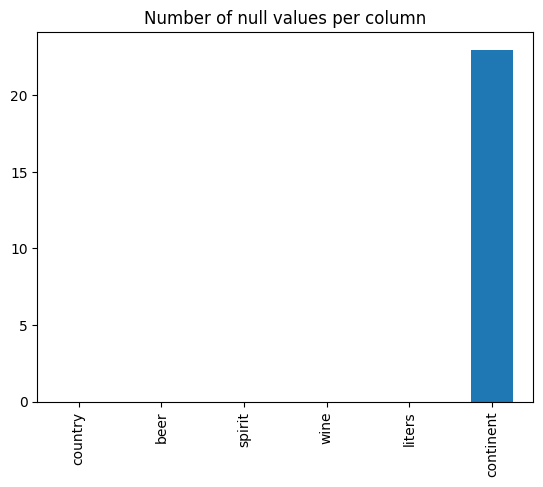

In [102]:
# Count the missing values in each column — remember by default, axis=0.
print((drinks.isnull().sum()))

drinks.isnull().sum().plot(kind='bar');         # visually
plt.title('Number of null values per column');

**Dropping Missing Values**

In [103]:
drinks.shape

(193, 6)

In [104]:
# Drop a row if ANY values are missing from any column — can be dangerous!
drinks.dropna()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [105]:
# Drop a row only if ALL values are missing.
drinks.dropna(how='all')

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


**Filling Missing Values**<br>
You may have noticed that the continent North America (NA) does not appear in the `continent` column. Pandas read in the original data and saw "NA", thought it was a missing value, and converted it to a `NaN`, missing value.

In [106]:
# Fill in missing values with "NA" — this is dangerous to do without manually verifying them!
drinks.continent.fillna(value='NA')

0      AS
1      EU
2      AF
3      EU
4      AF
       ..
188    SA
189    AS
190    AS
191    AF
192    AF
Name: continent, Length: 193, dtype: object

In [108]:
# Modifies "drinks" in-place
drinks.continent.fillna(value='NA', inplace=True)

<a id="exercise-three"></a>
### Exercise 3


<img src="./images/hands_on.jpg" width="100" height="100" align="right"/>

In [109]:
# Read ufo.csv into a DataFrame called "ufo".
ufo= pd.read_csv('./data/ufo.csv')
ufo.head(2)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


In [110]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80543 entries, 0 to 80542
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             80492 non-null  object
 1   Colors Reported  17034 non-null  object
 2   Shape Reported   72141 non-null  object
 3   State            80543 non-null  object
 4   Time             80543 non-null  object
dtypes: object(5)
memory usage: 3.1+ MB


In [111]:
# Check the shape of the DataFrame.
ufo.shape

(80543, 5)

In [112]:
# What are the three most common colors reported?
ufo['Colors Reported'].value_counts(ascending=False).head(3)

Colors Reported
ORANGE    5216
RED       4809
GREEN     1897
Name: count, dtype: int64

In [113]:
# Rename any columns with spaces so that they don't contain spaces.
ufo.rename(columns={'Shape Reported':'Shape_Reported', 'Colors Reported':'Colors-Reported'}, inplace=True)

In [114]:
pd.options.display.max_seq_items = 30

In [115]:
ufo[(ufo.State=='VA')].City.value_counts().head(1).index[0]

'Virginia Beach'

In [116]:
# For reports in VA, what's the most common city?
ufo[ufo['State']=='VA'].City.value_counts()


City
Virginia Beach    110
Richmond           92
Alexandria         48
Roanoke            35
Chesapeake         33
                 ... 
Norton              1
VA                  1
Burkeville          1
Rockfish            1
Faber               1
Name: count, Length: 397, dtype: int64

In [ ]:
# Print a DataFrame containing only reports from Arlington, VA.


In [ ]:
# Count the number of missing values in each column.


In [119]:
# How many rows remain if you drop all rows with any missing values?
print('the original size:', ufo.shape[0])
ufo.isna().sum()

the original size: 80543


City                  51
Colors-Reported    63509
Shape_Reported      8402
State                  0
Time                   0
dtype: int64

<a id="split-apply-combine"></a>
### Split-Apply-Combine

<img src="./images/pandas_tool.jpg" width="300" height="300" align="right"/>

Split-apply-combine is a pattern for analyzing data. Suppose we want to find mean beer consumption per country. Then:

- **Split:** We group data by continent.
- **Apply:** For each group, we apply the `mean()` function to find the average beer consumption.
- **Combine:** We now combine the continent names with the `mean()`s to produce a summary of our findings.

In [120]:
drinks.head(3)

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF


In [121]:
# For each continent, calculate the mean beer servings.
drinks.groupby('continent').beer.mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
NA    145.434783
OC     89.687500
SA    175.083333
Name: beer, dtype: float64

In [122]:
# For each continent, calculate the mean of all numeric columns.
drinks.groupby('continent').mean()

TypeError: Could not convert AlgeriaAngolaBeninBotswanaBurkina FasoBurundiCote d'IvoireCabo VerdeCameroonCentral African RepublicChadComorosCongoDR CongoDjiboutiEgyptEquatorial GuineaEritreaEthiopiaGabonGambiaGhanaGuineaGuinea-BissauKenyaLesothoLiberiaLibyaMadagascarMalawiMaliMauritaniaMauritiusMoroccoMozambiqueNamibiaNigerNigeriaRwandaSao Tome & PrincipeSenegalSeychellesSierra LeoneSomaliaSouth AfricaSudanSwazilandTogoTunisiaUgandaTanzaniaZambiaZimbabwe to numeric

In [123]:
# For each continent, describe beer servings.
drinks.groupby('continent').beer.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,61.471698,80.557816,0.0,15.00,32.0,76.00,376.0
AS,44.0,37.045455,49.469725,0.0,4.25,17.5,60.50,247.0
EU,45.0,193.777778,99.631569,0.0,127.00,219.0,270.00,361.0
NA,23.0,145.434783,79.621163,1.0,80.00,143.0,198.00,285.0
OC,16.0,89.687500,96.641412,0.0,21.00,52.5,125.75,306.0
SA,12.0,175.083333,65.242845,93.0,129.50,162.5,198.00,333.0


In [124]:
# For each continent, describe all numeric columns.
drinks.groupby('continent').describe()

beer                                                              
          count        mean        std   min     25%    50%     75%    max   
continent                                                                    
AF         53.0   61.471698  80.557816   0.0   15.00   32.0   76.00  376.0  \
AS         44.0   37.045455  49.469725   0.0    4.25   17.5   60.50  247.0   
EU         45.0  193.777778  99.631569   0.0  127.00  219.0  270.00  361.0   
NA         23.0  145.434783  79.621163   1.0   80.00  143.0  198.00  285.0   
OC         16.0   89.687500  96.641412   0.0   21.00   52.5  125.75  306.0   
SA         12.0  175.083333  65.242845  93.0  129.50  162.5  198.00  333.0   

          spirit              ...    wine        liters                       
           count        mean  ...     75%    max  count      mean       std   
continent                     ...                                             
AF          53.0   16.339623  ...   13.00  233.0   53.0  3.007547  2.647557  \
AS          44.0   60.840909  ...    8.00  123.0   44.0  2.170455  2.770239   
EU          45.0  132.555556  ...  195.00  370.0   45.0  8.617778  3.358455   
NA          23.0  165.739130  ...   34.00  100.0   23.0  5.995652  2.409353   
OC          16.0   58.437500  ...   23.25  212.0   16.0  3.381250  3.345688   
SA          12.0  114.750000  ...   98.50  221.0   12.0  6.308333  1.531166   

                                           
           min   25%    50%     75%   max  
continent                                  
AF         0.0  0.70   2.30   4.700   9.1  
AS         0.0  0.10   1.20   2.425  11.5  
EU         0.0  6.60  10.00  10.900  14.4  
NA         2.2  4.30   6.30   7.000  11.9  
OC         0.0  1.00   1.75   6.150  10.4  
SA         3.8  5.25   6.85   7.375   8.3  

[6 rows x 32 columns]

In [125]:
drinks.groupby('continent')

In [ ]:
# For each continent, count the number of rows.
print((drinks.continent.value_counts()))   # should be the same

In [150]:
df = pd.DataFrame({
    'colA':[None, False, False, True], 
    'colB': [None, 2, None, 4],
    'colC': [None, 'b', 'c', 'd'],
    'colD': [None, 2.0, 3.0, 4.0],
})
df
df.dropna(subset=['colB'])

,colA,colB,colC,colD
1,False,2.0,b,2.0
3,True,4.0,d,4.0


<a id="exercise-four"></a>
### Exercise 4 : TAKE HOME

<img src="./images/hands_on.jpg" width="100" height="100" align="right"/>

Use the "users" `DataFrame` or "users" file in the Data folder to complete the following.

In [126]:
users.head(2)

,user_id,age,gender,occupation,zip_code,boolage,is_young
0,1,24,M,technician,85711,True,0
1,2,53,F,other,94043,False,0


In [151]:
# For each occupation in "users", count the number of occurrences.
occ = users.groupby(['occupation'])
occ.occupation.count()

occupation
administrator     79
artist            28
doctor             7
educator          95
engineer          67
entertainment     18
executive         32
healthcare        16
homemaker          7
lawyer            12
librarian         51
marketing         26
none               9
other            105
programmer        66
retired           14
salesman          12
scientist         31
student          196
technician        27
writer            45
Name: occupation, dtype: int64

In [128]:
# For each occupation, calculate the mean age.
occ.age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [129]:
# For each occupation, calculate the minimum and maximum ages.
pd.DataFrame({'min_age':occ.age.min(), 'max_age':occ.age.max()})

,min_age,max_age
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [130]:
# For each combination of occupation and gender, calculate the mean age.
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

----

<a id="multiple-columns"></a>
## Selecting Multiple Columns and Filtering Rows

In [131]:
ufo.head()

,City,Colors-Reported,Shape_Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [132]:
# Or, combine into a single step (this is a Python list inside of the Python index operator!).
ufo[['City', 'State']].head()

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY


**Use `loc` to select columns by name.**

In [133]:
# "loc" locates the values from the first parameter (colon means "all rows"), and the column "City".
ufo.loc[:, 'City'] 

0                      Ithaca
1                 Willingboro
2                     Holyoke
3                     Abilene
4        New York Worlds Fair
                 ...         
80538                  Neligh
80539            Uhrichsville
80540                  Tucson
80541             Orland park
80542                Loughman
Name: City, Length: 80543, dtype: object

In [134]:
# Select two columns.
ufo.loc[:, ['City', 'State']]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
...,...,...
80538,Neligh,NE
80539,Uhrichsville,OH
80540,Tucson,AZ
80541,Orland park,IL


In [135]:
# Select a range of columns — unlike Python ranges, Pandas index ranges INCLUDE the final column in the range.
ufo.loc[:, 'City':'State']


,City,Colors-Reported,Shape_Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY
...,...,...,...,...
80538,Neligh,NaN,CIRCLE,NE
80539,Uhrichsville,NaN,LIGHT,OH
80540,Tucson,RED BLUE,NaN,AZ
80541,Orland park,RED,LIGHT,IL


In [136]:
# "loc" can also filter rows by "name" (the index).
# Row 0, all columns
ufo.loc[0, :]

City                       Ithaca
Colors-Reported               NaN
Shape_Reported           TRIANGLE
State                          NY
Time               6/1/1930 22:00
Name: 0, dtype: object

In [137]:
# Rows 0/1/2, all columns
ufo.loc[0:2, :]

,City,Colors-Reported,Shape_Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [138]:
# Rows 0/1/2, range of columns
ufo.loc[0:2, 'City':'State'] 

,City,Colors-Reported,Shape_Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


In [139]:
ufo.iloc[0:2, 0:4] 

,City,Colors-Reported,Shape_Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ


In [140]:
drinks.iloc[0:2, 0:4] 

,country,beer,spirit,wine
0,Afghanistan,0,0,0
1,Albania,89,132,54


<a id="joining-dataframes"></a>
### Joining (Merging) `DataFrames`


<img src="./images/panda_science.jpeg" width="300" height="300" align="right"/>

In [152]:
import pandas as pd
movie_cols = ['movie_id', 'title']
u_item = './data/movies.tbl'
movies = pd.read_csv(u_item, sep='|', header=None, names=movie_cols, usecols=[0, 1], encoding='latin-1')
movies.head()

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [153]:
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings_filename = './data/movie_ratings.tsv'

ratings = pd.read_csv(ratings_filename, sep='\t', header=None, names=rating_cols)
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [154]:
# Merge "movies" and "ratings" (inner join on "movie_id").
movie_ratings = pd.merge(movies, ratings,how='left', left_on='movie_id', right_on='movie_id')
movie_ratings.head()

,movie_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


In [155]:
print(movies.shape)
print(ratings.shape)
print(movie_ratings.shape)

(1682, 2)
(100000, 4)
(100000, 5)


## How to export your file?

In [156]:
movie_ratings.to_csv('new_movies.csv')

### More Details about Merging 
https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

## Pandas CheatSheet
https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

<a id="other-features"></a>
### OPTIONAL: Other Commonly Used Features

In [165]:
ufo.head()

,City,Colors-Reported,Shape_Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [158]:
# Apply an arbitrary function to each value of a Pandas column, storing the result in a new column.
users['under30'] = users.age.apply(lambda age: age < 30)

In [160]:
# Apply an arbitrary function to each row of a DataFrame, storing the result in a new column.
#  (Remember that, by default, axis=0. Since we want to go row by row, we set axis=1.)
users['under30male'] = users.apply(lambda row: row.age < 30 and row.gender == 'M', axis=1)

In [162]:
# Map existing values to a different set of values.
users['is_male'] = users.gender.map({'F':0, 'M':1})

In [164]:
# Replace all instances of a value in a column (must match entire value).
ufo.State.replace('Fl', 'FL', inplace=True)

In [171]:
# String methods are accessed via "str".
ufo.State.str.upper()                               # Converts to upper case
# checks for a substring
ufo['Colors-Reported'].str.contains('RED', na='False') 


0        False
1        False
2        False
3        False
4        False
         ...  
80538    False
80539    False
80540     True
80541     True
80542    False
Name: Colors-Reported, Length: 80543, dtype: object

In [174]:
# Convert a string to the datetime format (this is often slow — consider doing it in the "read_csv()" method.)
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo.Time.dt.hour                        # Datetime format exposes convenient attributes
(ufo.Time.max() - ufo.Time.min()).days  # Also allows you to do datetime "math"


30776

In [176]:
# Set and then remove an index.
ufo.set_index('Time', inplace=True)
ufo.reset_index(inplace=True)
ufo.head()

,Time,City,Colors-Reported,Shape_Reported,State
0,1930-06-01 22:00:00,Ithaca,NaN,TRIANGLE,NY
1,1930-06-30 20:00:00,Willingboro,NaN,OTHER,NJ
2,1931-02-15 14:00:00,Holyoke,NaN,OVAL,CO
3,1931-06-01 13:00:00,Abilene,NaN,DISK,KS
4,1933-04-18 19:00:00,New York Worlds Fair,NaN,LIGHT,NY


In [178]:
# Change the datatype of a column.
drinks['beer'] = drinks.beer.astype('float')
drinks.head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0.0,0,0,0.0,AS
1,Albania,89.0,132,54,4.9,EU
2,Algeria,25.0,0,14,0.7,AF
3,Andorra,245.0,138,312,12.4,EU
4,Angola,217.0,57,45,5.9,AF


In [179]:
# Create dummy variables for "continent" and exclude first dummy column.
continent_dummies = pd.get_dummies(drinks.continent, prefix='cont').iloc[:, 1:]

In [180]:
# Concatenate two DataFrames (axis=0 for rows, axis=1 for columns).
drinks = pd.concat([drinks, continent_dummies], axis=1)
drinks

,country,beer,spirit,wine,liters,continent,cont_AS,cont_EU,cont_NA,cont_OC,cont_SA
0,Afghanistan,0.0,0,0,0.0,AS,True,False,False,False,False
1,Albania,89.0,132,54,4.9,EU,False,True,False,False,False
2,Algeria,25.0,0,14,0.7,AF,False,False,False,False,False
3,Andorra,245.0,138,312,12.4,EU,False,True,False,False,False
4,Angola,217.0,57,45,5.9,AF,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela,333.0,100,3,7.7,SA,False,False,False,False,True
189,Vietnam,111.0,2,1,2.0,AS,True,False,False,False,False
190,Yemen,6.0,0,0,0.1,AS,True,False,False,False,False
191,Zambia,32.0,19,4,2.5,AF,False,False,False,False,False


<a id="uncommon-features"></a>
### OPTIONAL: Other Less-Used Features of Pandas

In [ ]:
# Detecting duplicate rows
users.duplicated()          # True if a row is identical to a previous row
users.duplicated().sum()    # Count of duplicates
users[users.duplicated()]   # Only show duplicates
users.drop_duplicates()     # Drop duplicate rows
users.age.duplicated()      # Check a single column for duplicates
users.duplicated(['age', 'gender', 'zip_code']).sum()   # Specify columns for finding duplicates

In [182]:
# Convert a range of values into descriptive groups.
drinks['beer_level'] = 'low'    # Initially set all values to "low"
drinks.loc[drinks.beer.between(101, 200), 'beer_level'] = 'med'     # Change 101-200 to "med"
drinks.loc[drinks.beer.between(201, 400), 'beer_level'] = 'high'    # Change 201-400 to "high"

In [183]:
# Display a cross-tabulation of two Series.
pd.crosstab(drinks.continent, drinks.beer_level)

beer_level,high,low,med
continent,,,
AF,4,45,4
AS,1,40,3
EU,24,9,12
NA,5,8,10
OC,3,11,2
SA,3,1,8


In [ ]:
# Convert "beer_level" into the "category" datatype.
drinks['beer_level'] = pd.Categorical(drinks.beer_level, categories=['low', 'med', 'high'])
drinks.sort_values('beer_level')   # Sorts by the categorical ordering (low to high)

In [ ]:
# Limit which rows are read when reading in a file — useful for large files!
pd.read_csv('./data/drinks.csv', nrows=10)           # Only read first 10 rows
pd.read_csv('./data/drinks.csv', skiprows=[1, 2])    # Skip the first two rows of data

In [ ]:
# Write a DataFrame out to a .csv
drinks.to_csv('drinks_updated.csv')                 # Index is used as first column
drinks.to_csv('drinks_updated.csv', index=False)    # Ignore index

In [ ]:
# Create a DataFrame from a dictionary.
pd.DataFrame({'capital':['Montgomery', 'Juneau', 'Phoenix'], 'state':['AL', 'AK', 'AZ']})

In [ ]:
# Create a DataFrame from a list of lists.
pd.DataFrame([['Montgomery', 'AL'], ['Juneau', 'AK'], ['Phoenix', 'AZ']], columns=['capital', 'state'])

In [ ]:
# Randomly sample a DataFrame.
import numpy as np
mask = np.random.rand(len(drinks)) < 0.66   # Create a Series of Booleans
train = drinks[mask]                        # Will contain around 66% of the rows
test = drinks[~mask]                        # Will contain the remaining rows

In [ ]:
# Change the maximum number of rows and columns printed ('None' means unlimited).
pd.set_option('max_rows', None)     # Default is 60 rows
pd.set_option('max_columns', None)  # Default is 20 columns
print(drinks)

In [ ]:
# Reset options to defaults.
pd.reset_option('max_rows')
pd.reset_option('max_columns')

In [ ]:
# Change the options temporarily (settings are restored when you exit the "with" block).
with pd.option_context('max_rows', None, 'max_columns', None):
    print(drinks)

<a id="summary"></a>
### Summary

Believe it or not, we've only barely touched the surface of everything that Pandas offers. Don't worry if you don't remember most of it — for now, just knowing what exists is key. Remember that the more you use Pandas to manipulate data, the more of these functions you will take interest in, look up, and remember.

In this notebook, the most important things to familiarize yourself with are the basics:
- Manipulating `DataFrames` and `Series`
- Filtering columns and rows
- Handling missing values
- Split-apply-combine (this one takes some practice!)